In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install pydot

In [16]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [17]:
def image_files(input_directory):
    filepaths=[]
    labels=[]
    
    digit_folders=os.listdir(input_directory)
    #print(digit_folders)
    
    for digit in digit_folders:
        path=os.path.join(input_directory, digit)
        flist=os.listdir(path)
        for f in flist:
            fpath=os.path.join(path,f)        
            filepaths.append(fpath)
            labels.append(digit) 
    return filepaths,labels

def load_images(filepaths):
    images = []
    for i in tqdm(range(len(filepaths))):
        img = image.load_img(filepaths[i], target_size=(244,244,3), grayscale=False)
        img = image.img_to_array(img)
        img.astype('float32')
        img = img/255
        images.append(img)

    images = np.array(images)
    return images

In [18]:
#load the paths and labels in differnt variables
directory = "10000/10000"
filepaths,labels = image_files(directory)

In [19]:
#load the 70K images
images = load_images(filepaths)

100%|██████████| 10000/10000 [01:02<00:00, 159.10it/s]


In [20]:
y = to_categorical(labels,num_classes=10)

In [47]:
#Train and test the images

X_train, X_test, y_train, y_test = train_test_split(images, y, random_state=42, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(8000, 244, 244, 3)
(8000, 10)
(2000, 244, 244, 3)
(2000, 10)


In [22]:
X_train[0]

array([[[0.6       , 0.5921569 , 0.4       ],
        [0.6       , 0.5921569 , 0.4       ],
        [0.6       , 0.5921569 , 0.4       ],
        ...,
        [0.58431375, 0.5647059 , 0.41568628],
        [0.58431375, 0.5647059 , 0.41568628],
        [0.58431375, 0.5647059 , 0.41568628]],

       [[0.6       , 0.5921569 , 0.4       ],
        [0.6       , 0.5921569 , 0.4       ],
        [0.6       , 0.5921569 , 0.4       ],
        ...,
        [0.58431375, 0.5647059 , 0.41568628],
        [0.58431375, 0.5647059 , 0.41568628],
        [0.58431375, 0.5647059 , 0.41568628]],

       [[0.6       , 0.5921569 , 0.4       ],
        [0.6       , 0.5921569 , 0.4       ],
        [0.6       , 0.5921569 , 0.4       ],
        ...,
        [0.58431375, 0.5647059 , 0.41568628],
        [0.58431375, 0.5647059 , 0.41568628],
        [0.58431375, 0.5647059 , 0.41568628]],

       ...,

       [[0.6       , 0.57254905, 0.40784314],
        [0.6       , 0.57254905, 0.40784314],
        [0.6       , 0

9


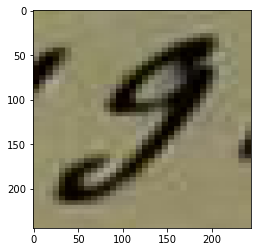

In [45]:
plt.imshow(X_train[0])
print(np.argmax(y_train[0]))

In [74]:
import tensorflow.keras as K

In [80]:
res_model=K.applications.ResNet50(include_top=False,weights='imagenet',input_tensor=K.Input(shape=(244,244,3)))

In [81]:
for layer in res_model.layers[:143]:
    layers.trainable=False

In [82]:
for i,layer in enumerate(res_model.layers):
    print(i,layer.name,'-',layer.trainable)

0 input_7 - True
1 conv1_pad - True
2 conv1_conv - True
3 conv1_bn - True
4 conv1_relu - True
5 pool1_pad - True
6 pool1_pool - True
7 conv2_block1_1_conv - True
8 conv2_block1_1_bn - True
9 conv2_block1_1_relu - True
10 conv2_block1_2_conv - True
11 conv2_block1_2_bn - True
12 conv2_block1_2_relu - True
13 conv2_block1_0_conv - True
14 conv2_block1_3_conv - True
15 conv2_block1_0_bn - True
16 conv2_block1_3_bn - True
17 conv2_block1_add - True
18 conv2_block1_out - True
19 conv2_block2_1_conv - True
20 conv2_block2_1_bn - True
21 conv2_block2_1_relu - True
22 conv2_block2_2_conv - True
23 conv2_block2_2_bn - True
24 conv2_block2_2_relu - True
25 conv2_block2_3_conv - True
26 conv2_block2_3_bn - True
27 conv2_block2_add - True
28 conv2_block2_out - True
29 conv2_block3_1_conv - True
30 conv2_block3_1_bn - True
31 conv2_block3_1_relu - True
32 conv2_block3_2_conv - True
33 conv2_block3_2_bn - True
34 conv2_block3_2_relu - True
35 conv2_block3_3_conv - True
36 conv2_block3_3_bn - True
37

In [83]:
model = K.models.Sequential()
model.add(res_model)
model.add(K.layers.Flatten())
model.add(K.layers.Dense(10, activation='softmax'))

In [84]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
h = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test,y_test),
    verbose=1,
)

Epoch 1/5
250/250 [==============================] - 2766s 11s/step - loss: 0.1525 - accuracy: 0.9555 - val_loss: 2.4126 - val_accuracy: 0.1990
Epoch 2/5
250/250 [==============================] - 2869s 11s/step - loss: 0.0982 - accuracy: 0.9694 - val_loss: 0.8592 - val_accuracy: 0.7475
Epoch 3/5
250/250 [==============================] - 3401s 14s/step - loss: 0.0503 - accuracy: 0.9836 - val_loss: 0.1477 - val_accuracy: 0.9540
Epoch 4/5
250/250 [==============================] - 2177s 9s/step - loss: 0.0261 - accuracy: 0.9909 - val_loss: 0.1609 - val_accuracy: 0.9605
Epoch 5/5
250/250 [==============================] - 2191s 9s/step - loss: 0.0634 - accuracy: 0.9829 - val_loss: 0.6130 - val_accuracy: 0.8840


In [88]:
model.save("digit.h5")

In [93]:
y=model.predict(X_test)

63/63 [==============================] - 112s 2s/step


6


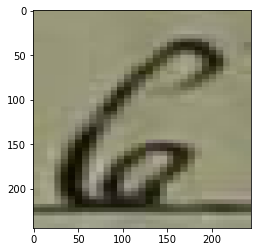

In [95]:
plt.imshow(X_test[0])
print(np.argmax(y[0]))